In [ ]:
import pandas as pd
import datasets
from datasets import list_datasets

In [ ]:
all_datasets = list_datasets()
print(len(all_datasets))

<ipython-input-3-05cc98b05aae>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


294989


In [ ]:
from datasets import load_dataset
emotion = load_dataset('dair-ai/emotion')
emotion.set_format(type='pandas')
df = emotion['train'][:]
df.head()

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
df['label_name'] = df['label'].apply(lambda x: classes[x])
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<Axes: xlabel='label_name'>

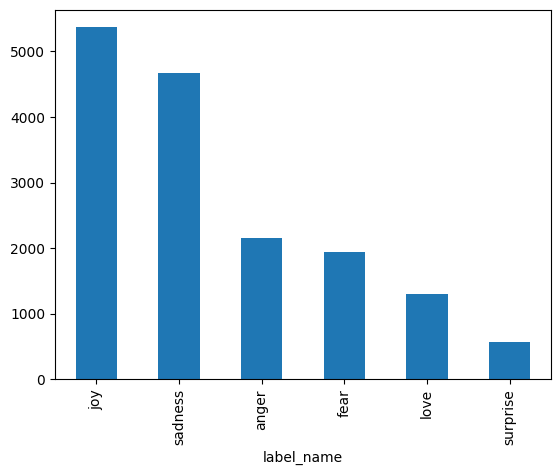

In [ ]:
label_count = df['label_name'].value_counts()
label_count.plot.bar()

In [ ]:
df


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


<Axes: title={'center': 'words count'}, xlabel='label_name'>

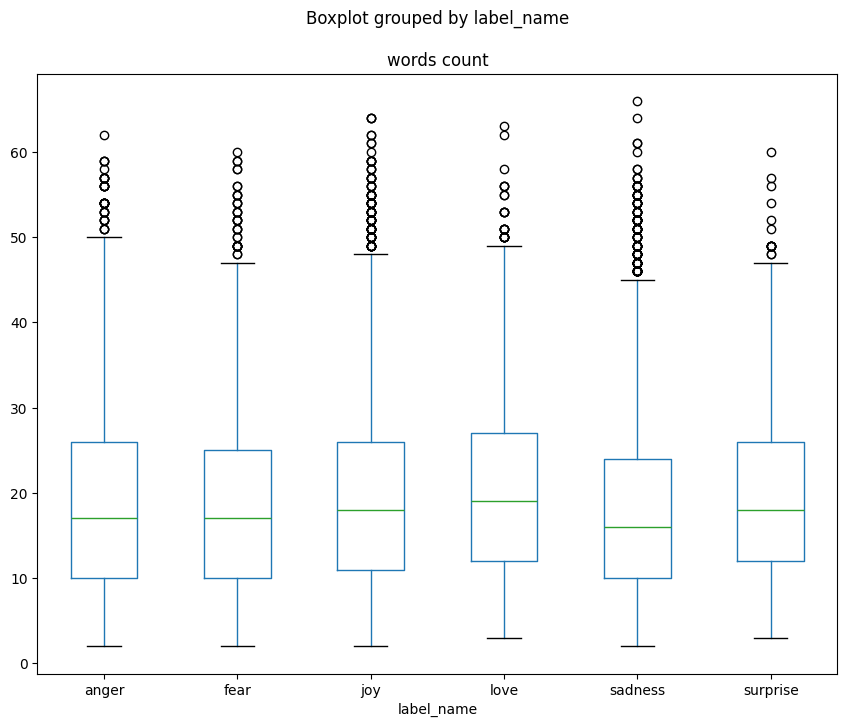

In [ ]:
df['words count'] = df['text'].str.split().apply(len)
df.boxplot('words count', by='label_name', grid=False, figsize=(10, 8))

In [ ]:
from transformers import AutoTokenizer
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text = "What are you doing"
encoding = tokenizer(text)
encoding

{'input_ids': [101, 2054, 2024, 2017, 2725, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
token = tokenizer.convert_ids_to_tokens(encoding['input_ids'])
token

['[CLS]', 'what', 'are', 'you', 'doing', '[SEP]']

In [ ]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotion.reset_format()

In [ ]:
def tokenize(batch):
  temp = tokenizer(batch['text'],padding=True,truncation=True)
  return temp

print(tokenize(emotion['train'][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
emotion_encoded = emotion.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
input = tokenizer(text, return_tensors='pt')
input

{'input_ids': tensor([[ 101, 2054, 2024, 2017, 2725,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [ ]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
with torch.no_grad():
  output = model(**input)
last_hidden_states = output.last_hidden_state


In [ ]:
last_hidden_states.shape

torch.Size([1, 6, 768])

In [ ]:
from transformers import AutoModelForSequenceClassification
num_label = len(classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_label).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device

device(type='cuda')

In [ ]:
from transformers import TrainingArguments
batch_size = 64
model_name = "distilbert-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy= 'epoch',
                                  disable_tqdm = False)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_score(pred):
  labels= pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {'accuracy': acc, 'f1': f1}

In [ ]:
from transformers import Trainer
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_score,
                  train_dataset=emotion_encoded['train'],
                  eval_dataset=emotion_encoded['validation'],
                  tokenizer=tokenizer)

<ipython-input-27-a460a604d99d>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lgarg092 (lgarg092-apj-abdul-kalam-technological-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.298770,0.906000,0.905479
2,0.513800,0.213086,0.923500,0.923508


TrainOutput(global_step=500, training_loss=0.51381005859375, metrics={'train_runtime': 271.8968, 'train_samples_per_second': 117.692, 'train_steps_per_second': 1.839, 'total_flos': 720342861696000.0, 'train_loss': 0.51381005859375, 'epoch': 2.0})

In [ ]:
preds_outputs = trainer.predict(emotion_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.21430987119674683,
 'test_accuracy': 0.915,
 'test_f1': 0.9139843616335884,
 'test_runtime': 3.9354,
 'test_samples_per_second': 508.204,
 'test_steps_per_second': 8.131}

In [ ]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       581
           1       0.93      0.94      0.94       695
           2       0.77      0.80      0.78       159
           3       0.92      0.92      0.92       275
           4       0.88      0.89      0.88       224
           5       0.81      0.58      0.67        66

    accuracy                           0.92      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.91      0.92      0.91      2000



In [ ]:
text = "you are a bitch. Shut up"
input_en = tokenizer(text,return_tensors='pt').to(device)
with torch.no_grad():
  outputs= model(**input_en)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-0.6718, -0.5397, -1.1214,  3.4078, -1.3870, -1.3072]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [ ]:
logits = outputs.logits
pred = torch.argmax(logits,dim=1).item()
pred,classes[pred]

(3, 'anger')